In [1]:
from dataset import MyDataset
from models import HW4Net1, HW4Net2, HW4Net3

from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['airplane', 'bus', 'cat', 'dog', 'pizza']
data_path = '/mnt/cloudNAS4/akshita/Documents/datasets/coco_custom'
val_dataset = MyDataset(root=data_path, categories=categories, split='val')

# batch_size = 1
# train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)

net1 = HW4Net1()
net1.load_state_dict(torch.load('results/Net1.pt'))

net2 = HW4Net2()
net2.load_state_dict(torch.load('results/Net2.pt'))

net3 = HW4Net3()
net3.load_state_dict(torch.load('results/Net3.pt'))

<All keys matched successfully>

In [2]:
def validation(net, val_dataset):
    true_labels = []
    pred_labels = []
    net.eval()
    for i in range(len(val_dataset)):
        img, label = val_dataset.__getitem__(i)
        # print(img.shape)
        true_labels.append(label)
        output = net(img.unsqueeze(0))
        output = F.softmax(output, dim=1)
        output = torch.argmax(output)
        pred_labels.append(output.item())
        # break
    return true_labels, pred_labels

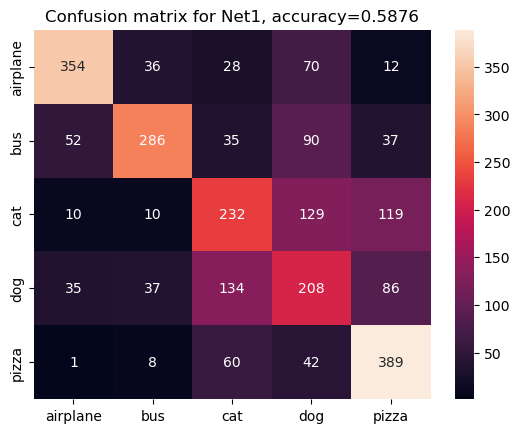

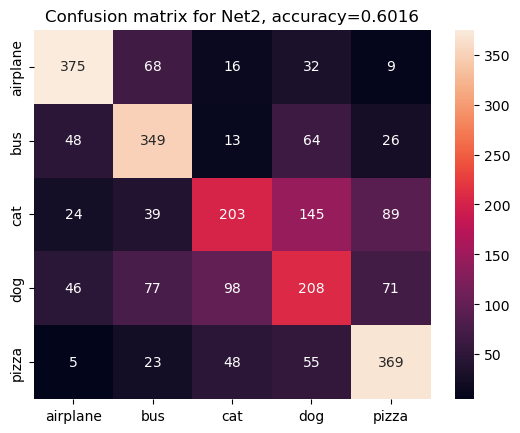

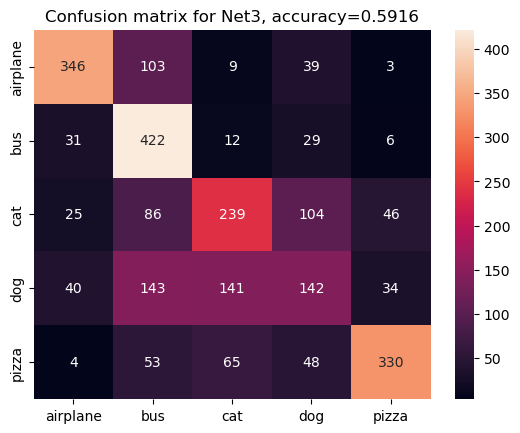

In [5]:
def validate_and_conf_matrix(net, val_dataset, name='Net'):
    t, p = validation(net, val_dataset=val_dataset)
    cm = confusion_matrix(t, p)
    plt.figure()
    sns.heatmap(cm, annot=cm, xticklabels=categories, yticklabels=categories, fmt='g')
    plt.title(f"Confusion matrix for {name}, accuracy={accuracy_score(t, p)}")
    plt.savefig(f'results/cm_{name}.png')

validate_and_conf_matrix(net1, val_dataset, name="Net1")
validate_and_conf_matrix(net2, val_dataset, name="Net2")
validate_and_conf_matrix(net3, val_dataset, name="Net3")


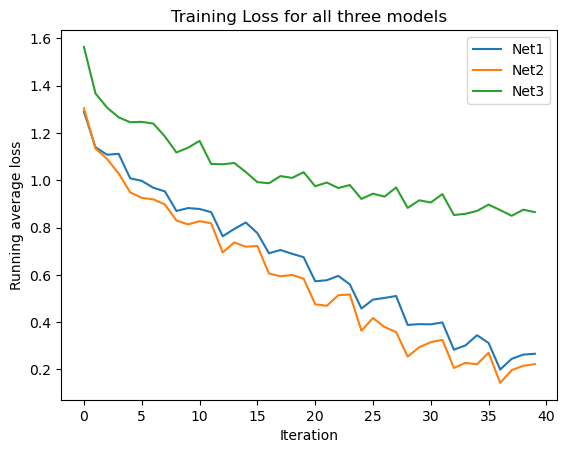

In [4]:
import pandas as pd

t_1 = pd.read_csv('results/Net1.csv', header=None)
t_2 = pd.read_csv('results/Net2.csv', header=None)
t_3 = pd.read_csv('results/Net3.csv', header=None)

plt.plot(t_1[2], label='Net1')
plt.plot(t_2[2], label='Net2')
plt.plot(t_3[2], label='Net3')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Running average loss")
plt.title("Training Loss for all three models")
plt.savefig('results/training_loss.png')